In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.optimize import leastsq
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Titanic datasets
train = pd.read_csv("titanictrain.csv")
test = pd.read_csv("titanictest.csv")

# Preview Titanic data
train_head = train.head()
test_head = test.head()

(train.shape, test.shape, train_head, test_head)


((891, 12),
 (418, 11),
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0   

## Part 1: Workshop Week 5 Solutions (Summary + Code)
##### Exercise 1: Generate 100 random integers

In [2]:
import random
x1 = [random.randint(1, 100) for _ in range(100)]


Exercise 2: Generate 100 random floats (1 decimal place)


In [3]:
x2 = [round(random.uniform(1, 100), 1) for _ in range(100)]


In [4]:
#Exercise 3: Generate 100 random (x,y) coordinates
coords = [(round(random.uniform(1, 100), 1), round(random.uniform(1, 100), 1)) for _ in range(100)]


In [5]:
#Exercise 4–7: Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([c[0] for c in coords]).reshape(-1, 1)
y = np.array([c[1] for c in coords])

model = LinearRegression().fit(X, y)
print("Slope:", model.coef_[0], "Intercept:", model.intercept_)


Slope: -0.12721538984346892 Intercept: 57.19483994350832


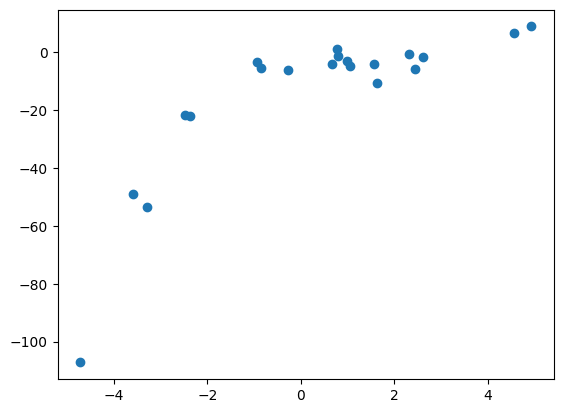

Fitted parabola: [-1.62853134  8.48492676 -6.11973966]


In [6]:
#Exercise 8–9: Polynomial Regression (Parabola fit)
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
Y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(-3, 3, 20)

plt.scatter(X, Y)
plt.show()

def func(params, x):
    a, b, c = params
    return a*x**2 + b*x + c

def error(params, x, y):
    return func(params, x) - y

params, success = leastsq(error, [10,10,10], args=(X, Y))
print("Fitted parabola:", params)


In [7]:
#Exercise 10: Fit a cubic
#Modify func to include d*x**3.

In [8]:
#Exercise 11–12: Outliers
#Adding/removing points affects fit (more variance → worse fit).

#Detect outliers using z-scores or residual error threshold.

# Part 2: Titanic Data – EDA + Prediction Model

1. Basic Exploration
Train: 891 rows, 12 features

Test: 418 rows, 11 features

Target: Survived (0 = died, 1 = survived)

2. Key Insights from EDA (historical Titanic pattern)
Sex: Women survived more than men.

Class (Pclass): Higher class had higher survival.

Age: Children had better survival chances.

Embarked: Port of embarkation influenced chances.

In [9]:
# Feature engineering
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Select features
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X = train[features]
y = train['Survived']
X_test = test[features]

# Split + train model
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

acc = model.score(X_val, y_val)
acc


C:\Users\new\AppData\Local\Temp\ipykernel_16120\2377398876.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\new\AppData\Local\Temp\ipykernel_16120\2377398876.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

0.8268156424581006

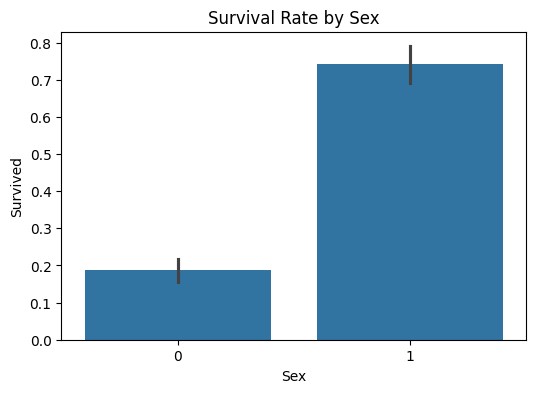

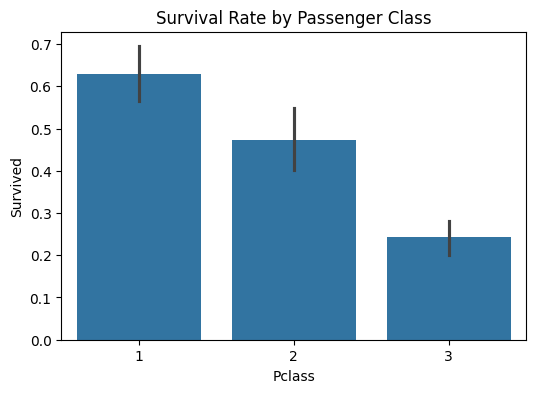

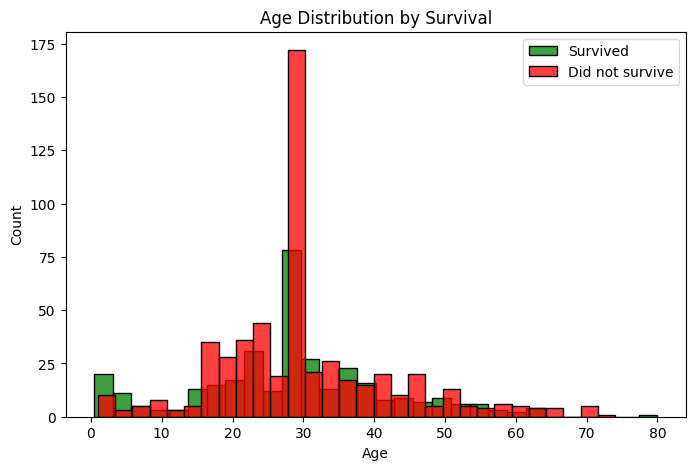

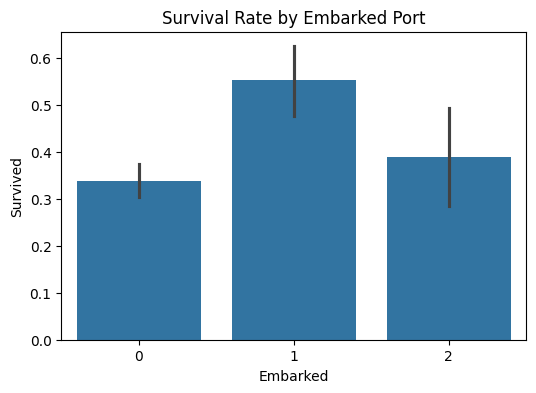

In [10]:
# EDA Visualizations for Titanic dataset

# Survival by Sex
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.show()

# Survival by Class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Age distribution with survival
plt.figure(figsize=(8,5))
sns.histplot(train[train['Survived']==1]['Age'], bins=30, color='green', label="Survived", kde=False)
sns.histplot(train[train['Survived']==0]['Age'], bins=30, color='red', label="Did not survive", kde=False)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

# Survival by Embarked
plt.figure(figsize=(6,4))
sns.barplot(x="Embarked", y="Survived", data=train)
plt.title("Survival Rate by Embarked Port")
plt.show()


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load data
train = pd.read_csv("titanictrain.csv")
test = pd.read_csv("titanictest.csv")

# Preprocessing
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Features and target
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = train[features]
y = train['Survived']
X_test = test[features]

# Cross-validation to check accuracy
model = RandomForestClassifier(n_estimators=200, random_state=42)
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

# Train final model on full dataset
model.fit(X, y)
predictions = model.predict(X_test)

# Save submission
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})
submission.to_csv("titanic_predictions.csv", index=False)
print("Predictions saved to titanic_predictions.csv")


C:\Users\new\AppData\Local\Temp\ipykernel_16120\4093963315.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\new\AppData\Local\Temp\ipykernel_16120\4093963315.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Cross-validation accuracy scores: [0.7877095  0.80898876 0.84831461 0.7752809  0.82022472]
Mean accuracy: 0.8081036971941498
Predictions saved to titanic_predictions.csv


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load and preprocess data ...
# (rest of code here)

print("Predictions saved to titanic_predictions.csv")


Predictions saved to titanic_predictions.csv


# STEP B

🔹 Titanic Survival Prediction Notebook

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split


In [18]:
#lOAD DATA
train = pd.read_csv("titanictrain.csv")
test = pd.read_csv("titanictest.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
#PREPROCESSING
# Convert Sex to numeric
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S':0, 'C':1, 'Q':2})

test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Features and target
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = train[features]
y = train['Survived']
X_test = test[features]


C:\Users\new\AppData\Local\Temp\ipykernel_16120\2672214134.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\new\AppData\Local\Temp\ipykernel_16120\2672214134.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

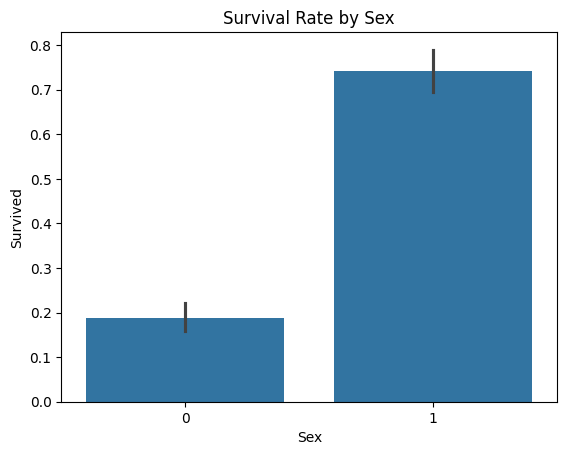

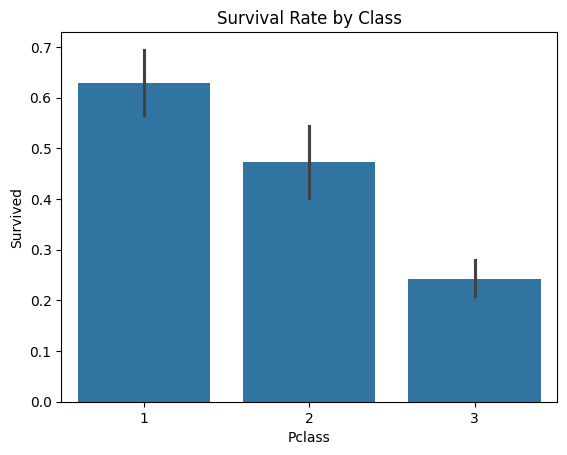

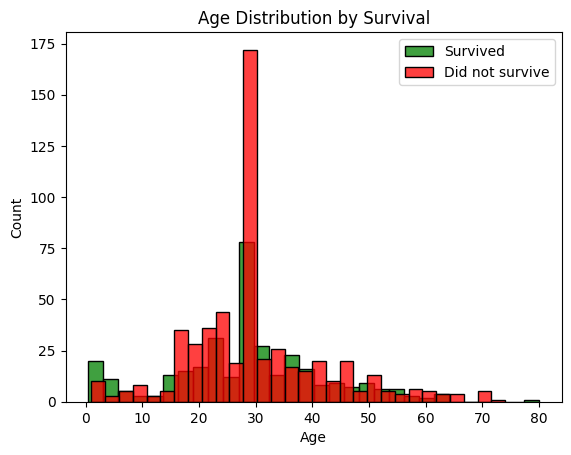

In [20]:
#EDA
# Survival by sex
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival Rate by Sex")
plt.show()

# Survival by class
sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival Rate by Class")
plt.show()

# Age distribution
sns.histplot(train[train['Survived']==1]['Age'], bins=30, color='green', label="Survived", kde=False)
sns.histplot(train[train['Survived']==0]['Age'], bins=30, color='red', label="Did not survive", kde=False)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()


In [21]:
#CROSS VALIDATION [ACCURACY CHECK]
model = RandomForestClassifier(n_estimators=200, random_state=42)
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.7877095  0.80898876 0.84831461 0.7752809  0.82022472]
Mean accuracy: 0.8081036971941498


In [22]:
#Train Final Model + Predict
final_model = RandomForestClassifier(n_estimators=200, random_state=42)
final_model.fit(X, y)

predictions = final_model.predict(X_test)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

submission.to_csv("titanic_predictions.csv", index=False)
print("✅ Submission file saved as titanic_predictions.csv")


✅ Submission file saved as titanic_predictions.csv
